In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("diabetes.csv")


In [3]:
# Display basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               718 non-null    float64
 1   Glucose                   739 non-null    float64
 2   BloodPressure             726 non-null    float64
 3   SkinThickness             737 non-null    float64
 4   Insulin                   718 non-null    float64
 5   BMI                       736 non-null    float64
 6   DiabetesPedigreeFunction  732 non-null    float64
 7   Age                       739 non-null    float64
 8   Outcome                   734 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [4]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0            NaN           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  


In [5]:
# Handling Missing Values
print("Missing Values before handling:")
print(df.isnull().sum())

Missing Values before handling:
Pregnancies                 50
Glucose                     29
BloodPressure               42
SkinThickness               31
Insulin                     50
BMI                         32
DiabetesPedigreeFunction    36
Age                         29
Outcome                     34
dtype: int64


In [6]:
# Remove columns with more than 30% missing values
df = df.dropna(thresh=0.7 * len(df), axis=1)

In [7]:
# Impute missing values using mean
df.iloc[:, :-1] = SimpleImputer(strategy='mean').fit_transform(df.iloc[:, :-1])

In [8]:

print("Missing Values after handling:")
print(df.isnull().sum())

Missing Values after handling:
Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                     34
dtype: int64


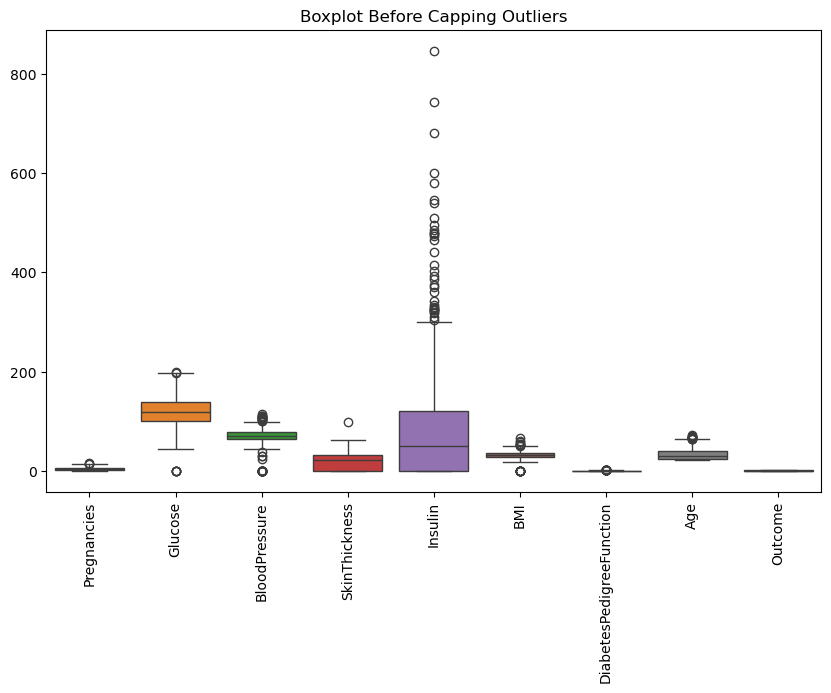

In [9]:
# Outlier Detection using Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot Before Capping Outliers")
plt.show()

In [10]:
# Capping Outliers using IQR Method
df_capped = df.copy()
for col in df.columns[:-1]:  # Exclude the target variable
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])

df = df_capped  # Updates dataset

In [11]:
df = df.dropna(subset=[df.columns[-1]])

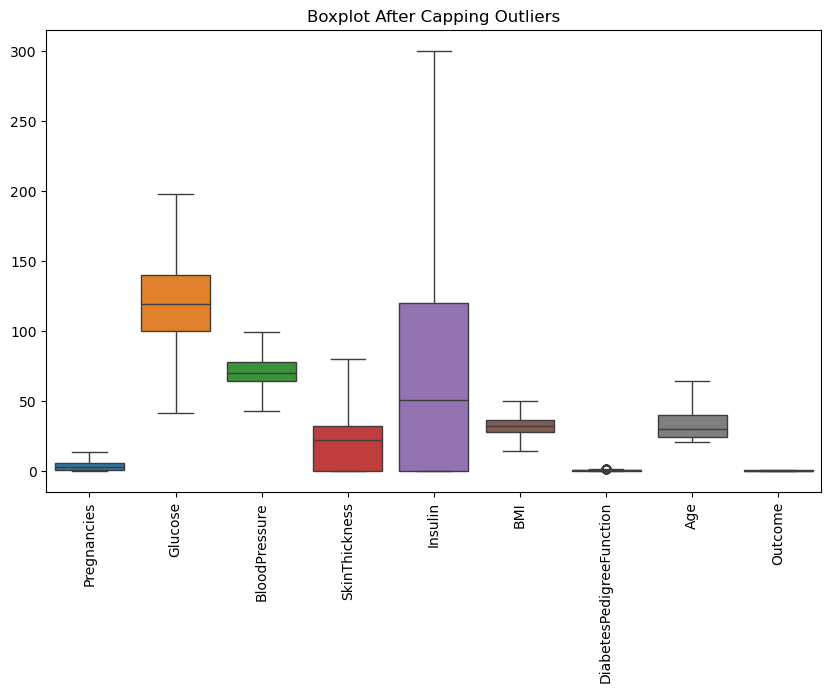

In [12]:
# Boxplot After Capping Outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot After Capping Outliers")
plt.show()

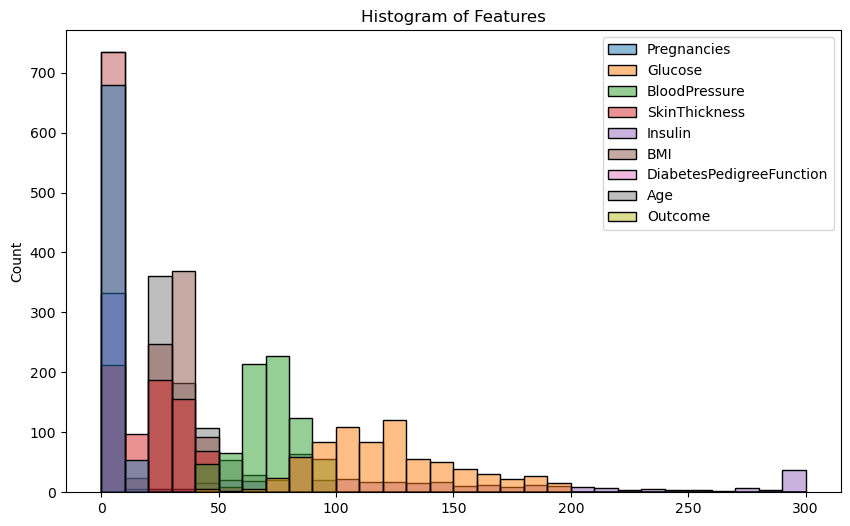

In [13]:
# Additional Visualizations
plt.figure(figsize=(10,6))
sns.histplot(df, bins=30)
plt.title("Histogram of Features")
plt.show()





In [14]:
# Normalization
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

In [15]:
# Feature Selection
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
selector = SelectKBest(score_func=f_classif, k=5)  # Selecting top 5 features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


In [16]:
# Feature Engineering
df['BMI_Age'] = df['BMI'] * df['Age']

In [17]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   734.000000  734.000000     734.000000     734.000000  734.000000   
mean      0.287747    0.510935       0.495815       0.255335    0.245566   
std       0.240511    0.196286       0.225686       0.193521    0.295522   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.074074    0.375000       0.375000       0.000000    0.000000   
50%       0.222222    0.496795       0.482143       0.275000    0.168333   
75%       0.444444    0.629808       0.625000       0.400000    0.400000   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  \
count  734.000000                734.000000  734.000000  734.000000   
mean     0.505711                  0.352822    0.284058    0.347411   
std      0.193874                  0.255687    0.260969    0.476472   
min      0.000000                  0.000000    0.000000    0.000000   
25%      0.375700                  0.156592    0.069767    0.000000   
50%      0.502204                  0.289234    0.209302    0.000000   
75%      0.627101                  0.491422    0.441860    1.000000   
max      1.000000                  1.000000    1.000000    1.000000   

          BMI_Age  
count  734.000000  
mean     0.146334  
std      0.144254  
min      0.000000  
25%      0.030680  
50%      0.101703  
75%      0.226089  
max      0.781228

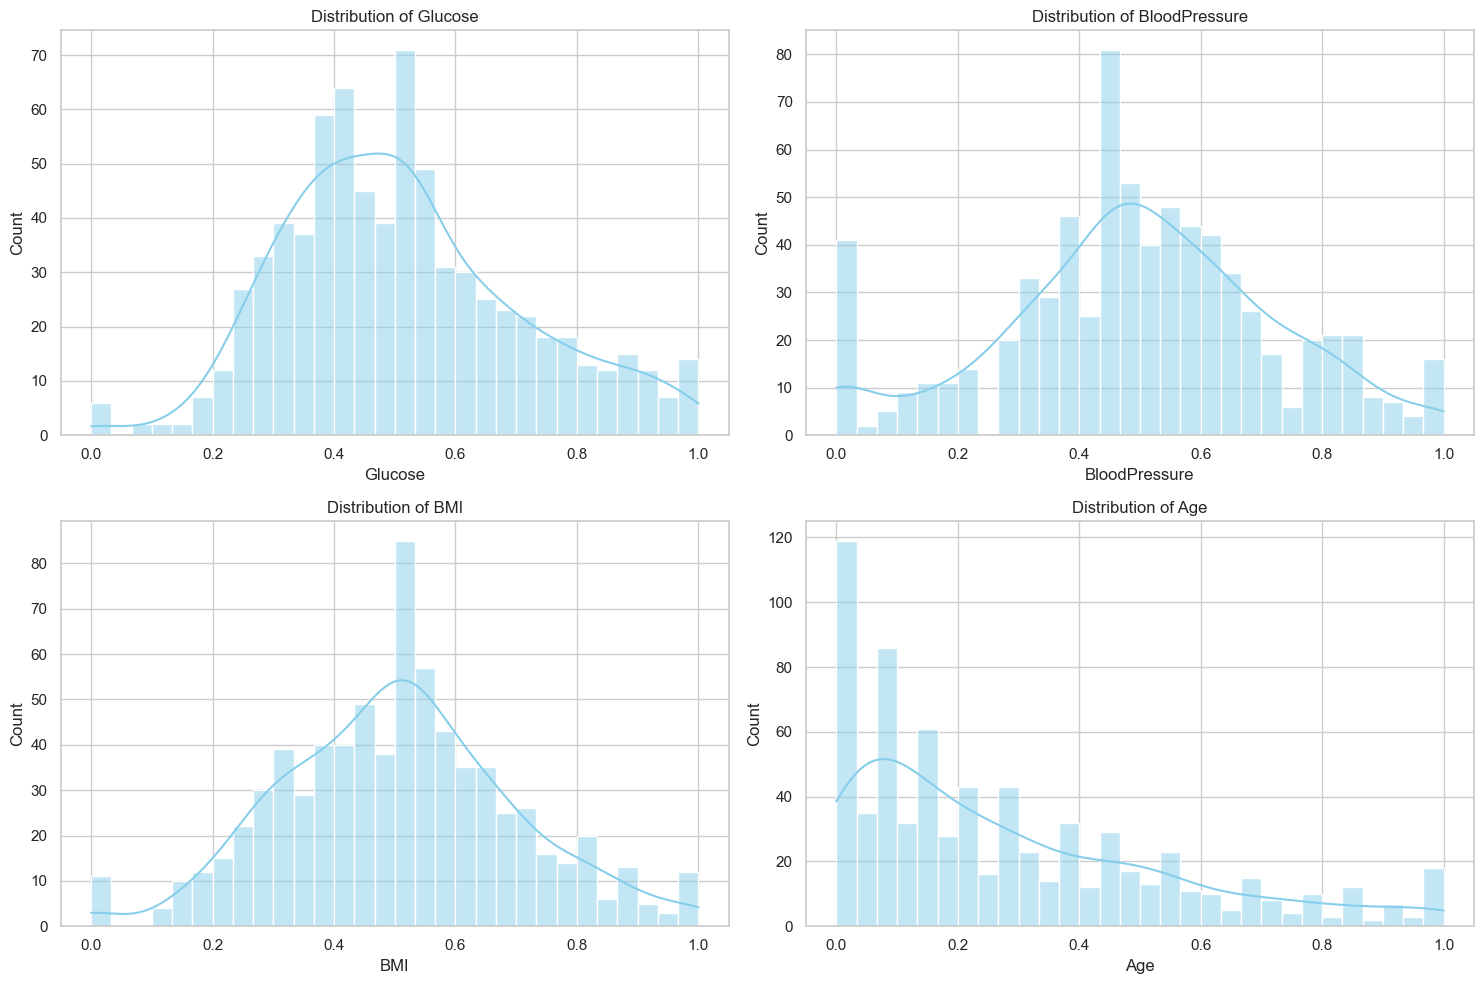

In [18]:
# Set plot style
sns.set(style="whitegrid")

# 1. Distribution Plots for Key Features
plt.figure(figsize=(15, 10))
features = ['Glucose', 'BloodPressure', 'BMI', 'Age']
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


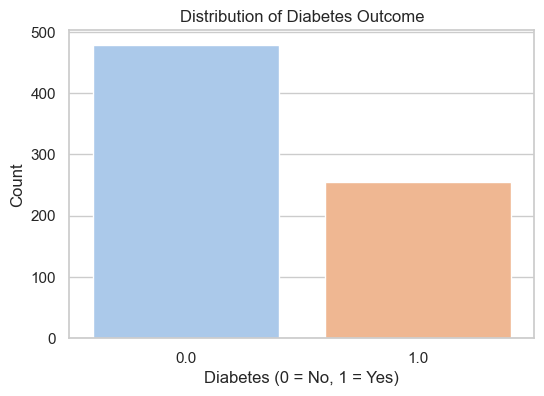

In [19]:
# 2. Count Plot for Outcome (Target Variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='pastel')
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


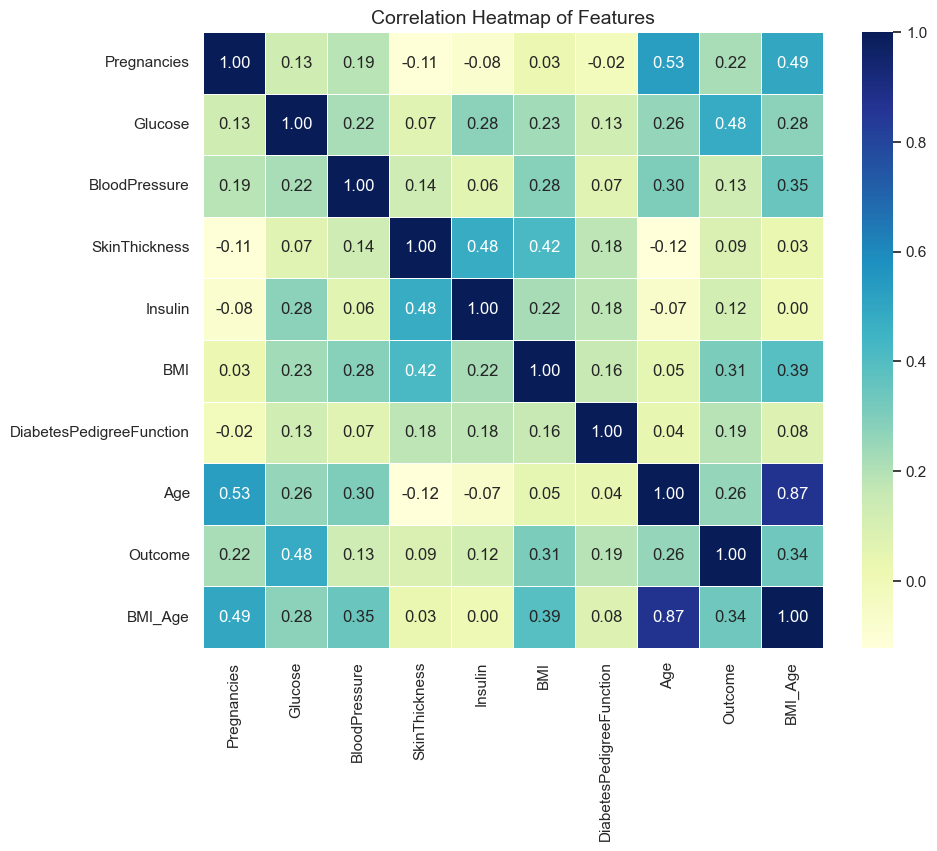

In [20]:
# 3. Correlation Heatmap (Better Styled)
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()


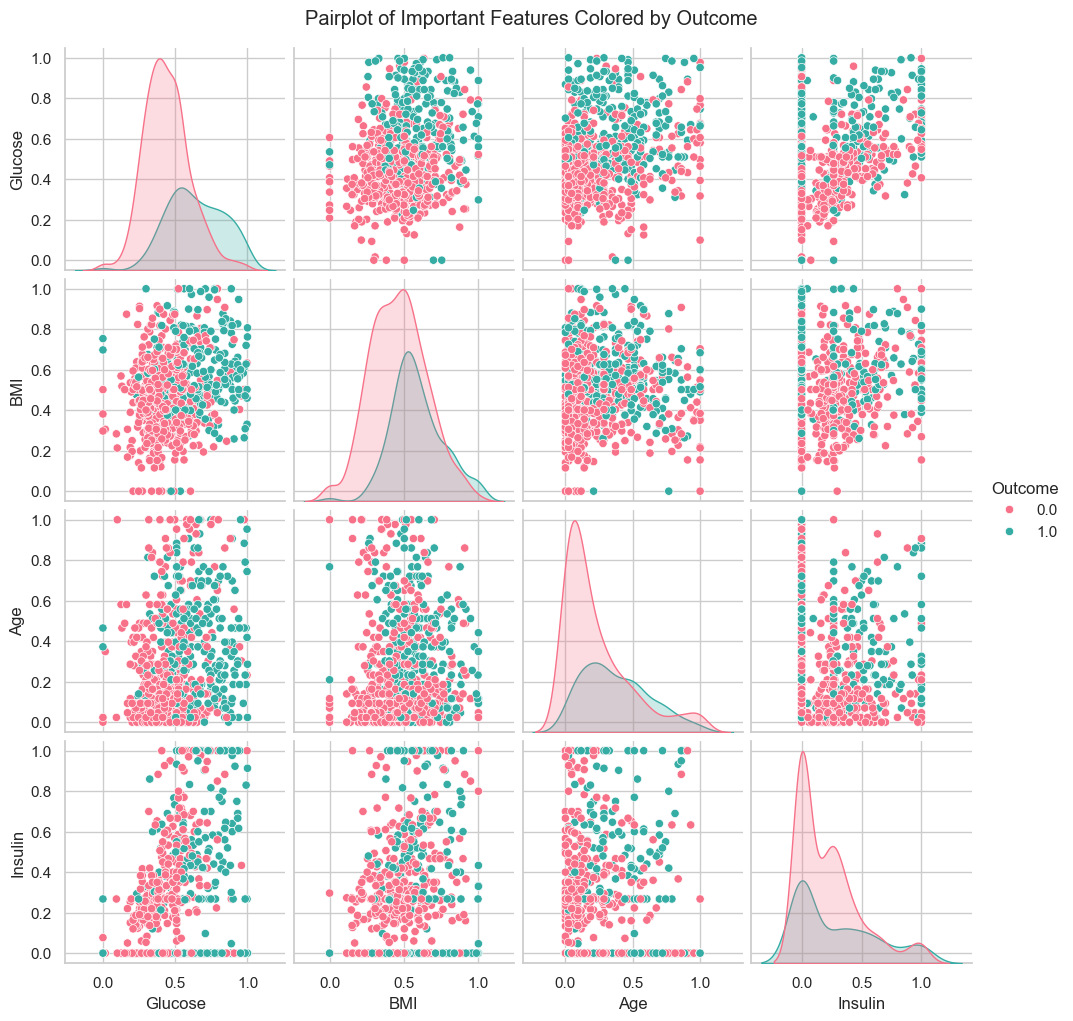

In [21]:
# 4. Pair Plot for Key Features (Optional but visually rich)
important_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']
sns.pairplot(df[important_features], hue='Outcome', palette='husl')
plt.suptitle('Pairplot of Important Features Colored by Outcome', y=1.02)
plt.show()
